# Regression Linéaire Simple du dataset Iris - Gradient Descent

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Dataset
Chargement du dataset Iris pour effectuer les prédictions de la largeur des pétales en fonction de longueur des pétales

In [34]:
dataset=pd.read_csv("iris.csv")

In [35]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


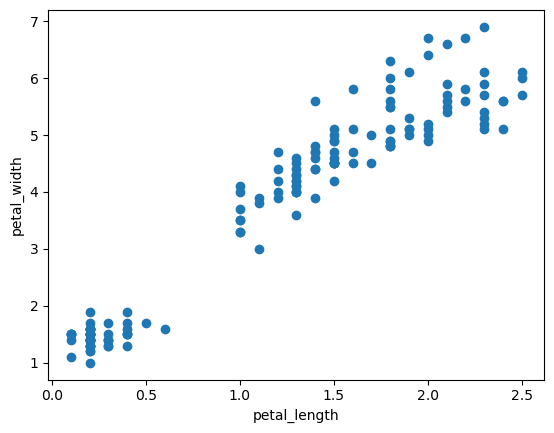

In [36]:
plt.plot(dataset["petal_width"],dataset["petal_length"],'o')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [37]:
df=dataset[['petal_length','petal_width']]
df

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [38]:

x=dataset.petal_length
y=dataset.petal_width


In [39]:
x.shape

(150,)

In [40]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [41]:
y.shape

(150,)

Important: Après avoir vérifié les dimensions de x et y, On remarque que y n'a pas les dimensions (150, 1) et x n'a pas les dimensions (150,2). On corrige le problème avec np.reshape et values.

In [42]:
X=dataset.petal_length.values
Y=dataset.petal_width.values
X


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [43]:
X.shape

(150,)

In [44]:
x=dataset.petal_length.values.reshape(150,1)
y=dataset.petal_width.values.reshape(150,1)

In [45]:
print(x.shape)
print(y.shape)

(150, 1)
(150, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [46]:
#X=np.hstack((np.ones((150,1)),x))
X=np.hstack((x,(np.ones(x.shape))))
X

array([[1.4, 1. ],
       [1.4, 1. ],
       [1.3, 1. ],
       [1.5, 1. ],
       [1.4, 1. ],
       [1.7, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.5, 1. ],
       [1.6, 1. ],
       [1.4, 1. ],
       [1.1, 1. ],
       [1.2, 1. ],
       [1.5, 1. ],
       [1.3, 1. ],
       [1.4, 1. ],
       [1.7, 1. ],
       [1.5, 1. ],
       [1.7, 1. ],
       [1.5, 1. ],
       [1. , 1. ],
       [1.7, 1. ],
       [1.9, 1. ],
       [1.6, 1. ],
       [1.6, 1. ],
       [1.5, 1. ],
       [1.4, 1. ],
       [1.6, 1. ],
       [1.6, 1. ],
       [1.5, 1. ],
       [1.5, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.2, 1. ],
       [1.3, 1. ],
       [1.5, 1. ],
       [1.3, 1. ],
       [1.5, 1. ],
       [1.3, 1. ],
       [1.3, 1. ],
       [1.3, 1. ],
       [1.6, 1. ],
       [1.9, 1. ],
       [1.4, 1. ],
       [1.6, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.4, 1. ],
       [4.7, 1. ],
       [4.5, 1. ],
       [4.9,

In [47]:

X.shape

(150, 2)

Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [48]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.


In [49]:
def model(X, theta):
    return X.dot(theta)

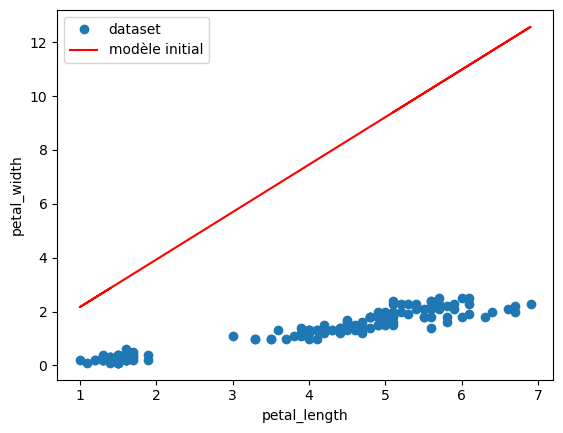

In [50]:
plt.plot(x,y,'o',label='dataset')
plt.plot(x, model(X, theta), c='r',label='modèle initial')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.
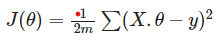

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [51]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [52]:
cost_function(X, y, theta)

19.835212925097306

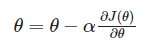

In [53]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [54]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [55]:
n_iterations = 100 #0.02172855 l'erreur minimale pour 1000 itéreations
learning_rate = 0.1


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [56]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([12.86262003,  8.34551287,  5.4190995 ,  3.52315916,  2.29477531,
        1.49884689,  0.983073  ,  0.64879147,  0.43208781,  0.2915574 ,
        0.20037777,  0.1411729 ,  0.10268627,  0.07762563,  0.06126685,
        0.05054945,  0.04349065,  0.03880587,  0.03566282,  0.03352218,
        0.03203447,  0.03097316,  0.0301914 ,  0.02959393,  0.02911893,
        0.02872627,  0.02838983,  0.0280926 ,  0.02782346,  0.02757512,
        0.02734277,  0.02712321,  0.02691427,  0.02671449,  0.02652283,
        0.02633853,  0.02616106,  0.02598998,  0.02582494,  0.02566567,
        0.0255119 ,  0.02536342,  0.02522003,  0.02508153,  0.02494776,
        0.02481854,  0.02469372,  0.02457315,  0.02445667,  0.02434416,
        0.02423547,  0.02413047,  0.02402904,  0.02393105,  0.0238364 ,
        0.02374496,  0.02365663,  0.0235713 ,  0.02348886,  0.02340923,
        0.02333231,  0.02325799,  0.02318621,  0.02311686,  0.02304986,
        0.02298515,  0.02292263,  0.02286223,  0.02280389,  0.02

In [57]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 0.39888582],
       [-0.28698595]])

In [58]:
theta_final[0]

array([0.39888582])

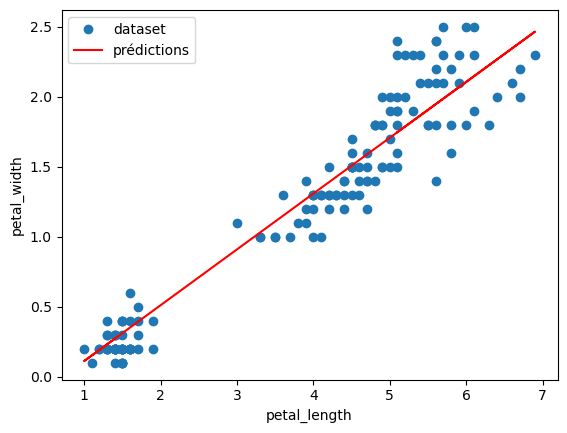

In [59]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x,y,'o',label='dataset')
plt.plot(x,predictions , c='r',label='prédictions')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

In [60]:
# Test: # prédire la largeur d'un pétale qui a une longueur de 2,5 cm
X_2_5= np.array([2.5,1])
pred_y_2_5=model(X_2_5, theta_final) 
print(pred_y_2_5)

[0.71022859]


## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

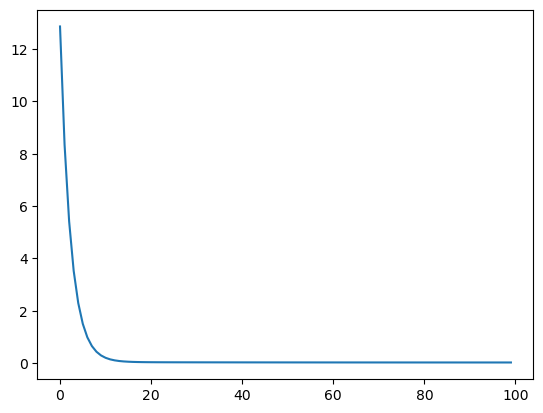

In [61]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

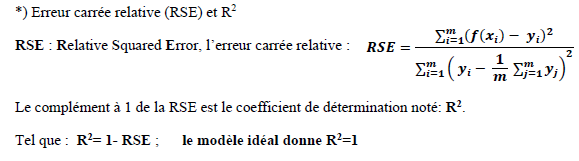

In [62]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [63]:
coef_determination(y, predictions)

0.9249370517181963

In [64]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
